# Data Loading and preprocessing

# Handling Missing Values & Data Cleaning

# Descriptive Statistics and  summary

# Visualization (Univariate, bivariate, multivariate)

# Insights on Churn Behavior

In [91]:
# load important libraries for EDA project

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# lets load the data into df variable

In [180]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [95]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [96]:
# As we seen , the data is huge. So all columns no showing
# So lets check the total columns name

In [97]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [98]:
# lets check the shape of data

In [99]:
df.shape

(7043, 21)

In [100]:
# The dataser contains 7043 rows indicate customers with 21 features
# Each row represent a unique customer with various attributes
# related to demographic, services, and billing
# The dataset size is sufficient for meaningful analysis and prediction
# with 21 features , we have a good mix of categorical and numerical
# to explore customer behavior and churn pattern

In [101]:
# lets check data type of each feature

In [102]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [103]:
# most of the columns are categorical(Object type)
# SeniorCitizen is stored as int64 , but since its a binary variable
# 0 & 1 it can be treated as categorical
# Total charges is stores as an Object, which seems incorrect
# since it represent a numerical values
# It may contain missing values or be formatted incorrect
# We need to convert it to float for proper analysis

In [104]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors= 'coerce')

In [105]:
# check the conversion

In [106]:
df['TotalCharges'].dtype

dtype('float64')

In [107]:
# Check for missing values in each columns

In [108]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [109]:
# only one columns TotalCharges has missing values
# 11 missing values
# since Total charges is numerical , these missing values were
# likely empty spaces in original dataset before conversion
# possible ways to handle missing values:-
# 1 - Fill them with median or mean of TotalCharges
# 2 -  Fill them with zero , but total charges not be zero
# 3 - Drop these 11 rows, but if we do 11 customers also drop
# from 7043 . we may loss data
#So better to fill the missing value
# fill them with median  because median is good if we may contain
#outliers

In [110]:
df['TotalCharges'].median()

1397.475

In [111]:
df['TotalCharges'].mean()

np.float64(2283.3004408418656)

In [112]:
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipython-input-2840544469.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [113]:
#so lets check the missing values again

In [114]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [115]:
# lets check for the duplicate records

In [116]:
df.duplicated().sum()

np.int64(0)

In [117]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [118]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [119]:
categorical_col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
      'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

In [120]:
for i in categorical_col:
  print(f"Unique Valus in {i} is :- ")
  print(df[i].unique(), "\n")
  print("---------------------------")

Unique Valus in gender is :- 
['Female' 'Male'] 

---------------------------
Unique Valus in SeniorCitizen is :- 
[0 1] 

---------------------------
Unique Valus in Partner is :- 
['Yes' 'No'] 

---------------------------
Unique Valus in Dependents is :- 
['No' 'Yes'] 

---------------------------
Unique Valus in PhoneService is :- 
['No' 'Yes'] 

---------------------------
Unique Valus in MultipleLines is :- 
['No phone service' 'No' 'Yes'] 

---------------------------
Unique Valus in InternetService is :- 
['DSL' 'Fiber optic' 'No'] 

---------------------------
Unique Valus in OnlineSecurity is :- 
['No' 'Yes' 'No internet service'] 

---------------------------
Unique Valus in OnlineBackup is :- 
['Yes' 'No' 'No internet service'] 

---------------------------
Unique Valus in DeviceProtection is :- 
['No' 'Yes' 'No internet service'] 

---------------------------
Unique Valus in TechSupport is :- 
['No' 'Yes' 'No internet service'] 

---------------------------
Unique Valus in

In [121]:
# lets check for the distribution of numerical feature
# also check the outliers

Text(0.5, 1.0, 'Monthly Charges Boxplot')

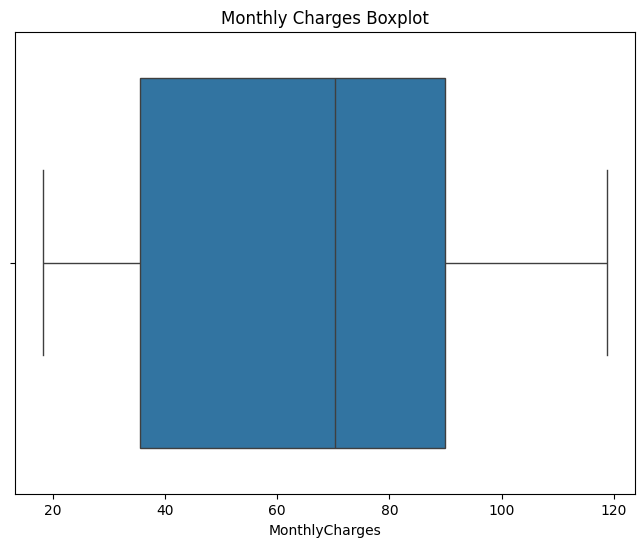

In [122]:
plt.figure(figsize=(8,6))
sns.boxplot(data= df, x= 'MonthlyCharges')
plt.title("Monthly Charges Boxplot")

Text(0.5, 1.0, 'Total Charges Boxplot')

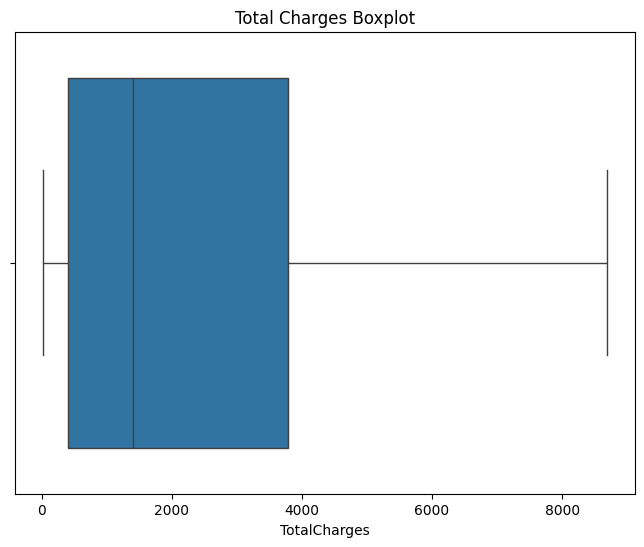

In [123]:
plt.figure(figsize=(8,6))
sns.boxplot(data= df, x= 'TotalCharges')
plt.title("Total Charges Boxplot")

In [124]:
# Since there are no outliers in the Monthly Charges and Total Charges
# This is the clean data distribution
# No extreme values are distorting the distribution
# This mean data is alredy well behaved for statistical analysis and modeling
# No need for transformation or removal

In [125]:
df[["TotalCharges", "MonthlyCharges", "tenure"]].describe()

,TotalCharges,MonthlyCharges,tenure
count,7043.000000,7043.000000,7043.000000
mean,2281.916928,64.761692,32.371149
std,2265.270398,30.090047,24.559481
min,18.800000,18.250000,0.000000
25%,402.225000,35.500000,9.000000
50%,1397.475000,70.350000,29.000000
75%,3786.600000,89.850000,55.000000
max,8684.800000,118.750000,72.000000


In [126]:
# The average of TotalCharge per customer is 2281.91
# and the median i.e. middle valus is 1397.48 , which is significantly
# indicate than median is lower than mean i.e. right skew distribution
# The monthly charge also little bit left skew
# The median tenure is 29 month . maximum customer is for long
# term


In [127]:
# to understand the distribution of tenure among customer

In [128]:
# Histogram / kde plot

Text(0.5, 1.0, 'Distribution of tenure among customer')

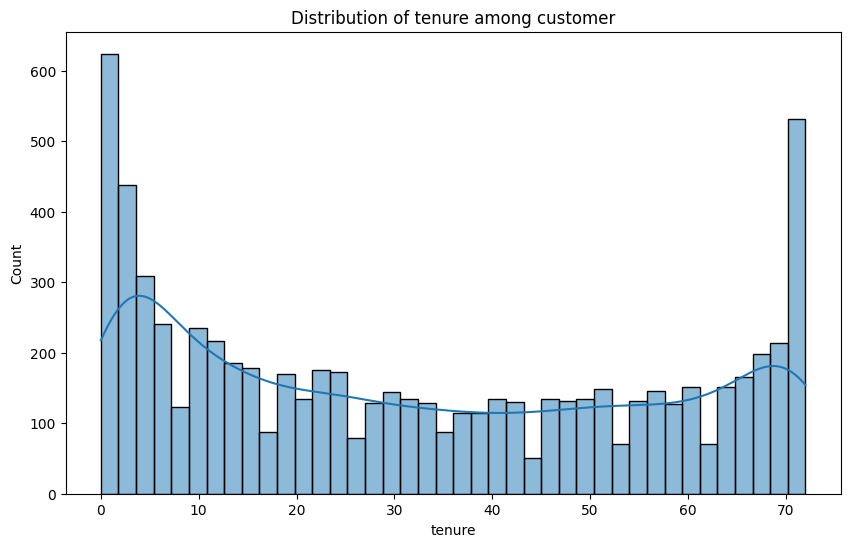

In [129]:
plt.figure(figsize=(10,6))
sns.histplot(data= df, x = 'tenure', kde=True, bins=40)
plt.title("Distribution of tenure among customer")

In [130]:
# the fact that the distribution looks uniform , suggest that customers are
# evenly distributed accross different tenure range
# so lets check for the monthly charges and total charges distribution

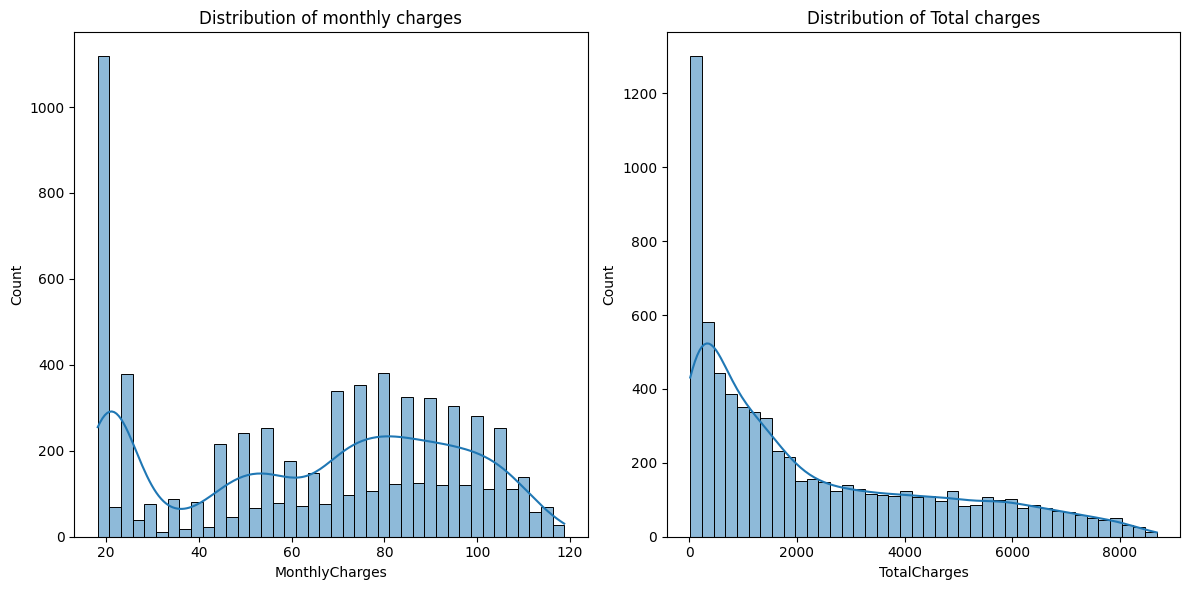

In [131]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(data= df, x= "MonthlyCharges", kde=True, bins =40)
plt.title("Distribution of monthly charges")

plt.subplot(1,2,2)
sns.histplot(data= df, x= "TotalCharges", kde=True, bins =40)
plt.title("Distribution of Total charges")

plt.tight_layout()

In [132]:
# MonthlyCharges- symmetric distribution
# spread accross 18 to 118
# total charges - right skewed with many
# low charges customers

In [133]:
# lets check for the categorical columns

In [134]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [135]:
df['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


Text(0.5, 1.0, 'Customers count by Contract ')

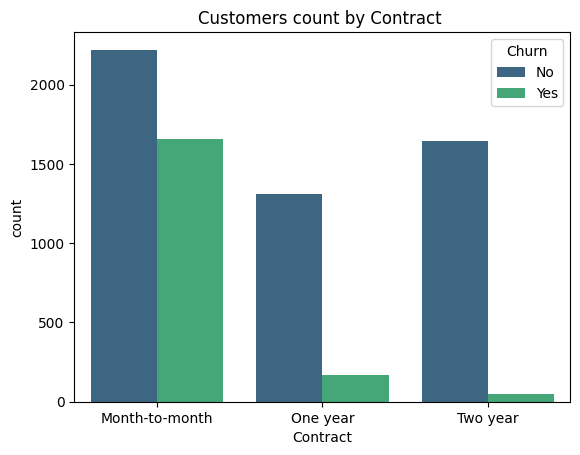

In [136]:
sns.countplot(data = df, x= 'Contract', hue='Churn', palette='viridis')
plt.title("Customers count by Contract ")

In [137]:
df.groupby("Contract")["Churn"].value_counts().unstack()

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [138]:
df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack()*100

Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


In [139]:
# Majority of customers approx 42% are on moth to month contract which
# is potential churn
# one year and rwo year contract indicating highers stability
# business impication - customers on month to month contracts
# may need loyalty discount to commit a longer contract
# long - term customers should be rewarded with better benifits to maintain
# retention

In [140]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [141]:
# lets check for the senior citizen

In [142]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [143]:
df['SeniorCitizen'].value_counts(normalize=True)*100

,proportion
SeniorCitizen,
0,83.785319
1,16.214681


In [144]:
# Around 16% of the cutomer are senoir citizen
# So lets check for the chrun rate

In [145]:
df.groupby("SeniorCitizen")["Churn"].value_counts().unstack()

Churn,No,Yes
SeniorCitizen,,
0,4508,1393
1,666,476


In [146]:
df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack()*100

Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


In [147]:
# Insights may check the senior citizen Income source

# If we impliment the discount for the sinioer citizen than the chrun
# rate may minimize

# May be they dont get the better cutomer supports. eg. phone asssitnace

# Implimatation and Simplified Billing And Payment options




<Axes: xlabel='SeniorCitizen', ylabel='count'>

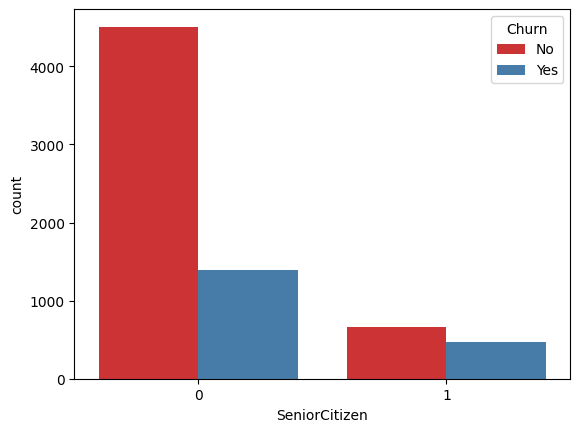

In [148]:
sns.countplot(data=df , x="SeniorCitizen", hue= "Churn",palette="Set1")

In [149]:
Seniordf =df[df['SeniorCitizen']==1]

In [150]:
sc=Seniordf.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack()*100

In [151]:
sc

Churn,No,Yes
SeniorCitizen,,
1,58.318739,41.681261


Text(0.5, 1.0, 'Proporation of Senioer Citizen')

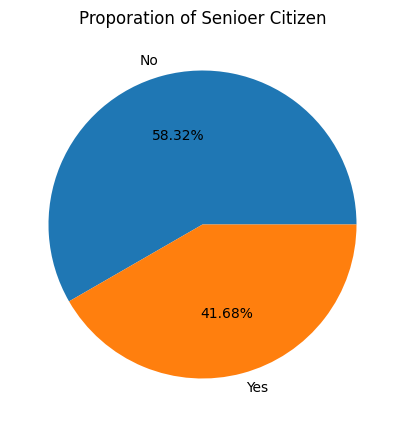

In [152]:
from enum import auto
plt.figure(figsize=(5,5))
plt.pie(sc.loc[1].values,labels=sc.loc[1].index,autopct="%1.2f%%")
plt.title("Proporation of Senioer Citizen")

In [153]:
# Lets checck for partner

In [154]:
df['Partner'].value_counts()

,count
Partner,
No,3641
Yes,3402


In [155]:
df['Partner'].value_counts(normalize=True)*100

,proportion
Partner,
No,51.69672
Yes,48.30328


In [156]:
df.groupby("Partner")["Churn"].value_counts().unstack()

Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


In [157]:
df.groupby("Partner")["Churn"].value_counts(normalize=True).unstack()*100

Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903


In [158]:
withpartner=df[df['Partner']=="Yes"]

In [159]:
WP=withpartner.groupby("Partner")["Churn"].value_counts(normalize=True).unstack()*100

In [160]:
sc

Churn,No,Yes
SeniorCitizen,,
1,58.318739,41.681261


In [161]:
nopartner=df[df['Partner']=="No"]

In [162]:
NP=nopartner.groupby("Partner")["Churn"].value_counts(normalize=True).unstack()*100

Text(0.5, 1.0, 'Proporation of Senioer Citizen')

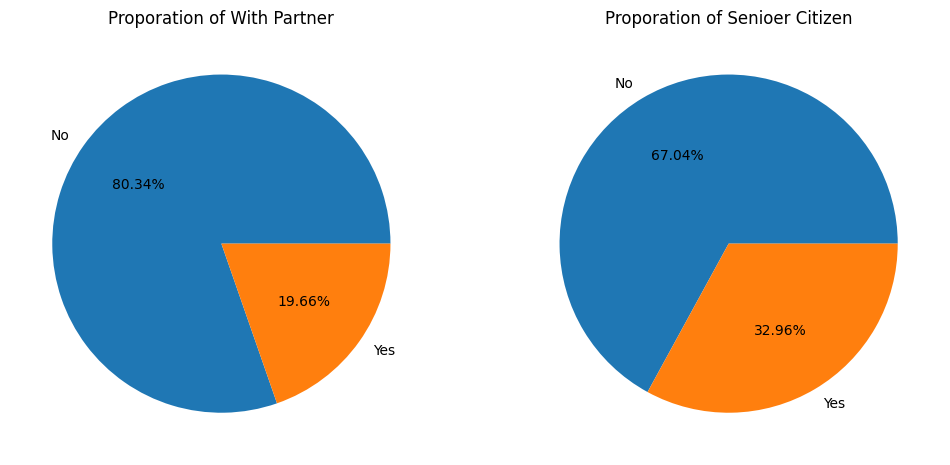

In [163]:
from enum import auto
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.pie(WP.loc["Yes"].values,labels=WP.loc["Yes"].index,autopct="%1.2f%%")
plt.title("Proporation of With Partner")

plt.subplot(1,2,2)
plt.pie(NP.loc["No"].values,labels=NP.loc["No"].index,autopct="%1.2f%%")
plt.title("Proporation of Senioer Citizen")


In [164]:
# lets check for InternetService

In [165]:
df['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [166]:
df['InternetService'].value_counts(normalize=True)*100

,proportion
InternetService,
Fiber optic,43.958540
DSL,34.374556
No,21.666903


In [167]:
df.groupby("InternetService")["Churn"].value_counts().unstack()

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


<Axes: xlabel='InternetService', ylabel='count'>

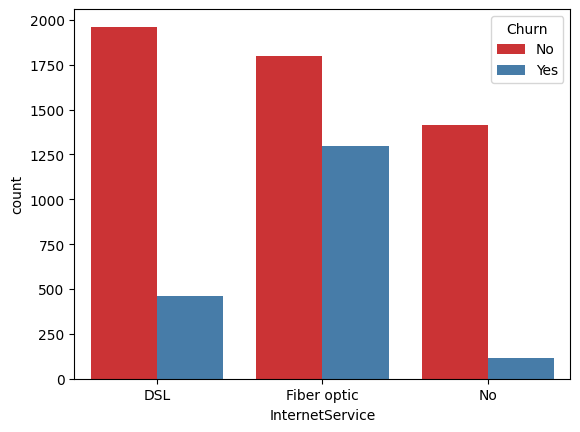

In [168]:
sns.countplot(data=df , x="InternetService", hue= "Churn",palette="Set1")

In [169]:
IS=df.groupby("InternetService")["Churn"].value_counts(normalize=True).unstack()*100

In [170]:
IS

Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


In [171]:
label=IS.index.tolist()
not_churn=IS['No'].tolist()
churn=IS['Yes'].tolist()

In [172]:
label

['DSL', 'Fiber optic', 'No']

In [173]:
not_churn

[81.04089219330855, 58.10723514211886, 92.59501965923984]

In [174]:
churn

[18.95910780669145, 41.89276485788114, 7.404980340760157]

In [175]:
withDSL = df [df['InternetService']=="DSL"]

In [176]:
DSL=withDSL.groupby("InternetService")["Churn"].value_counts(normalize=True).unstack()*100

In [177]:
DSL

Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108


Text(0.5, 1.0, 'Proporation of with Partner')

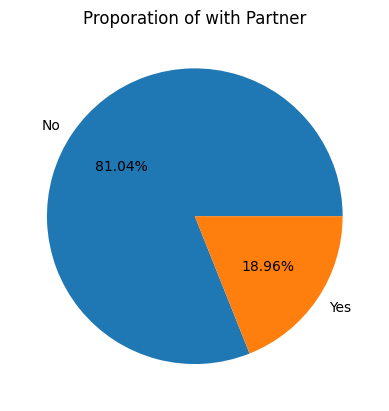

In [178]:
plt.pie(DSL.loc["DSL"].values,labels=DSL.loc["DSL"].index,
        autopct="%1.2f%%")
plt.title("Proporation of with Partner")